In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

In [3]:
# Input: (Parquet File) mapillary coverage lines per tile 

# Output: Buffered lines per tile for pano only and all

In [4]:
#mapillary_coverage_23_bb = gpd.read_parquet("mapillary_coverage_23_bb.parquet")
#mapillary_coverage_23_bb = gpd.read_parquet("mapillary_coverage_23_germany_2025-03-30.parquet")

#mapillary_coverage = gpd.read_parquet("mapillary_coverage_alltime_berlin_2025-04-02.parquet")

#mapillary_coverage = gpd.read_parquet("output_germany/mapillary_coverage_from23-01-01_germany_combined_output_full_april.parquet")

mapillary_coverage = gpd.read_parquet("output_berlin_2025-05-10_combined/mapillary_coverage_from23-01-01_berlin_combined_output_full_2025-05-10.parquet")


#mapillary_coverage_23_bb.plot()

mapillary_coverage

,geometry,captured_at,creator_id,id,image_id,is_pano,organization_id,tile_x,tile_y
0,"LINESTRING (13.10992 52.41489, 13.10994 52.414...",2023-06-23,1.052392e+14,KmhPR9i80tlDJ1OMZfCAUn,1.295554e+15,False,NaN,8788.0,5381.0
1,"MULTILINESTRING ((13.10345 52.40702, 13.10342 ...",2023-10-03,1.024688e+14,eVTy7GWiNhBXUCEqP8cD3F,1.064942e+15,False,NaN,8788.0,5381.0
2,"LINESTRING (13.09933 52.41023, 13.09929 52.410...",2023-03-24,1.024688e+14,LiZlp6Ke0PwMhA9fqXQI2D,6.942574e+15,False,NaN,8788.0,5381.0
3,"LINESTRING (13.09916 52.41027, 13.09918 52.410...",2023-10-03,1.024688e+14,XUxujHc0tkgz2Ay86i1ZvG,1.252863e+15,False,NaN,8788.0,5381.0
4,"LINESTRING (13.10136 52.4092, 13.10137 52.4092...",2025-03-26,1.332999e+15,9gBPQyzqM1JeX4DRsvKZAN,6.683265e+14,False,NaN,8788.0,5381.0
...,...,...,...,...,...,...,...,...,...
46065,"MULTILINESTRING ((13.73743 52.41146, 13.73742 ...",2023-04-10,1.071645e+14,S7Ku6ZdUxH5EBkiMsbIAq3,1.396649e+15,True,NaN,8817.0,5381.0
46066,"MULTILINESTRING ((13.74973 52.4142, 13.74959 5...",2023-04-10,1.071645e+14,FyZHPoxp2gJrjAqDI0hlWE,9.419880e+14,True,NaN,8817.0,5381.0
46067,"LINESTRING (13.73836 52.41582, 13.73832 52.415...",2023-04-10,1.071645e+14,K7oHbBijTA0vGk3uC5fUaz,1.850142e+15,True,NaN,8817.0,5381.0
46068,"LINESTRING (13.73698 52.41582, 13.73712 52.415...",2023-01-07,1.071645e+14,q4o5X3zaUhWFDyP7MdkeJp,7.376251e+14,True,NaN,8817.0,5381.0


Text(0.5, 1.0, 'Germany - later than 2023-01-01: Both Pano and Non-Pano')

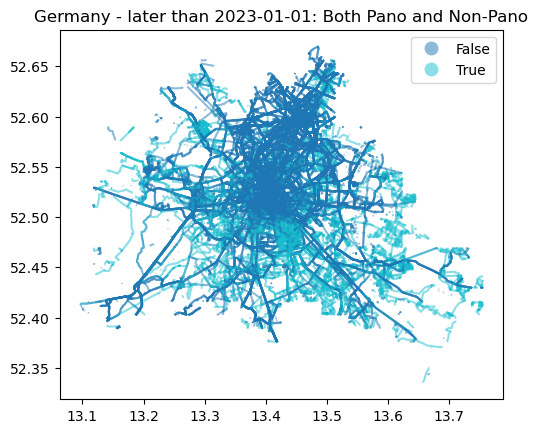

In [5]:
ax = mapillary_coverage.plot(column="is_pano", alpha=0.5, legend=True)
#plt.title("No Time Filter: Both Pano and Non-Pano")
plt.title("Germany - later than 2023-01-01: Both Pano and Non-Pano")

In [10]:
bland = gpd.read_file("https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/1_sehr_hoch.geo.json")
bland=bland[bland["id"].isin(["DE-BE"])]

In [11]:
bland.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'Berlin - later than 2023-01-01: Both Pano and Non-Pano')

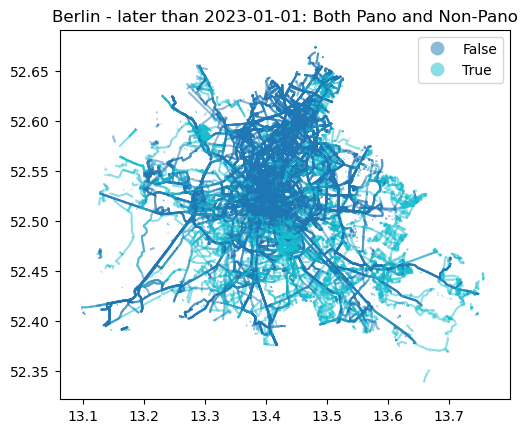

In [12]:
mapillary_coverage_clipped = mapillary_coverage.clip(bland)

ax = mapillary_coverage_clipped.plot(column="is_pano", alpha=0.5, legend=True)
#plt.title("No Time Filter: Both Pano and Non-Pano")
plt.title("Berlin - later than 2023-01-01: Both Pano and Non-Pano")

In [9]:
from datetime import datetime
import pandas as pd

# Convert 'captured_at' to datetime
mapillary_coverage_clipped['captured_at'] = pd.to_datetime(mapillary_coverage_clipped['captured_at'])

# Create a naive Timestamp with the desired date (no timezone information)
filter_date = pd.Timestamp(datetime(2024, 1, 1))

# Filter rows where 'captured_at' is after January 1, 2023
filtered_mapillary_coverage = mapillary_coverage_clipped[
    mapillary_coverage_clipped['captured_at'] >= filter_date
]

Text(0.5, 1.0, 'later than 2024-01-01: Both Pano and Non-Pano')

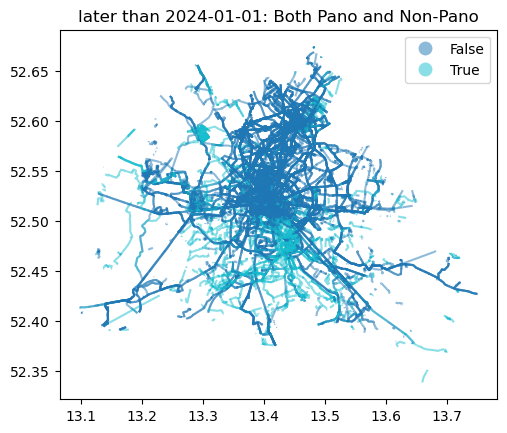

In [10]:
from datetime import datetime, timezone
ax = filtered_mapillary_coverage.plot(column="is_pano", alpha=0.5, legend=True)
plt.title("later than 2024-01-01: Both Pano and Non-Pano")

In [6]:

# berlin both pano and non-pano ~ 1min
## Germany: both pano and non-pano ~ 25min


#input_file = mapillary_coverage_clipped
input_file = mapillary_coverage



#filtered_mapillary_coverage_pano=mapillary_coverage[mapillary_coverage.is_pano==True]

# expolde the geometry to make buffering faster
mapillary_coverage_exploded = input_file.explode(index_parts=False, ignore_index=True)

# create 10m buffers for all the lines
mapillary_coverage_buffered = mapillary_coverage_exploded.to_crs(25832).copy()
mapillary_coverage_buffered['geometry'] = mapillary_coverage_buffered['geometry'].buffer(10)

# dissolve the buffered geometries for pano and non-pano
#mapillary_coverage_dissolved = mapillary_coverage_buffered.dissolve(by=['tile_x', 'tile_y'])

# ## for all (pano and non-pano)
# mapillary_coverage_buffered_regular=mapillary_coverage_buffered[mapillary_coverage_buffered.is_pano==False]
# mapillary_coverage_dissolved_regular = mapillary_coverage_buffered.dissolve(by=['tile_x', 'tile_y'])

# # for pano only
# mapillary_coverage_buffered_pano=mapillary_coverage_buffered[mapillary_coverage_buffered.is_pano==True]
# mapillary_coverage_dissolved_pano = mapillary_coverage_buffered_pano.dissolve(by=['tile_x', 'tile_y'])


mapillary_coverage_dissolved = mapillary_coverage_buffered.dissolve(by=['tile_x', 'tile_y','is_pano'])


#mapillary_coverage_dissolved_all=mapillary_coverage_dissolved_all.reset_index()
#mapillary_coverage_dissolved_pano=mapillary_coverage_dissolved_pano.reset_index()

mapillary_coverage_dissolved=mapillary_coverage_dissolved.reset_index()

#mapillary_coverage_dissolved.to_parquet("mapillary_coverage_23_germany_buffered10m_dissolved_pano_25-04-06.parquet")
#mapillary_coverage_dissolved.to_parquet("mapillary_coverage_23_germany_buffered10m_dissolved_all_25-04-06.parquet")


#mapillary_coverage_dissolved_all.to_parquet("mapillary_coverage_23_berlin_buffered10m_dissolved_all_25-04-06_test.parquet")
#mapillary_coverage_dissolved_pano.to_parquet("mapillary_coverage_23_berlin_buffered10m_dissolved_pano_25-04-06_test.parquet")



In [7]:
#mapillary_coverage_dissolved_all.to_parquet("mapillary_coverage_23_berlin_buffered10m_dissolved_all_2025-05-10.parquet")
#mapillary_coverage_dissolved_pano.to_parquet("mapillary_coverage_23_berlin_buffered10m_dissolved_pano_2025-05-10.parquet")


mapillary_coverage_dissolved.to_parquet("mapillary_coverage_23_berlin_buffered10m_dissolved_2025-05-10.parquet")

In [8]:
mapillary_coverage_dissolved

,tile_x,tile_y,is_pano,geometry,captured_at,creator_id,id,image_id,organization_id
0,8788.0,5381.0,False,"MULTIPOLYGON (((778910.464 5814334.768, 778909...",2023-06-23,1.052392e+14,KmhPR9i80tlDJ1OMZfCAUn,1.295554e+15,NaN
1,8788.0,5381.0,True,"POLYGON ((779316.909 5815032.459, 779317.361 5...",2024-06-12,1.052028e+15,NElXQWAiv0UnKCjz3Pqkmf,3.575419e+14,4.069521e+14
2,8789.0,5372.0,False,"MULTIPOLYGON (((779982.134 5827701.689, 779981...",2023-06-17,1.059060e+14,FsMI3kGuEQgAHtcx2ybeP4,2.838978e+14,NaN
3,8789.0,5372.0,True,"MULTIPOLYGON (((780088.413 5827858.229, 780088...",2024-09-18,1.102822e+14,qek591BdVaP7oUFhzDSRKx,1.222825e+15,NaN
4,8789.0,5373.0,False,"MULTIPOLYGON (((779501.299 5825958.266, 779502...",2024-03-24,1.029234e+14,8YKy1hNFCwrBW7ubveOEkp,7.259097e+14,NaN
...,...,...,...,...,...,...,...,...,...
735,8816.0,5380.0,True,"POLYGON ((821118.492 5818751.9, 821121.271 581...",2023-04-10,1.071645e+14,mFZVQSCocHfLAUYukqaGO7,1.376094e+14,NaN
736,8816.0,5381.0,True,"POLYGON ((821018.926 5817770.798, 821009.795 5...",2023-08-13,1.071645e+14,1yu8ioJE9KP0hcbNtSZWfX,2.397369e+14,NaN
737,8817.0,5379.0,False,"MULTIPOLYGON (((821751.737 5819408.576, 821752...",2025-02-11,6.077910e+14,yiuTDNUY1PvIM6BoWwtQKx,6.608385e+14,NaN
738,8817.0,5379.0,True,"MULTIPOLYGON (((821981.775 5819337.496, 821981...",2023-04-10,1.071645e+14,mFZVQSCocHfLAUYukqaGO7,1.376094e+14,NaN
